# Neural Network From Scratch


### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

### Layer_Dense class

In [2]:
class Layer_Dense:
    def __init__(self, n_features, n_neurons):

        #we wanna our network values to tend to the range of [-1, +1], rather than scale the inputs
        self.weights = 0.10 * np.random.randn(n_features, n_neurons)

        #We may not wanna initialize biases with zeros when the network is going to be dead network (outputs zeros)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights)


### Activation functions

#### ReLU 

In [3]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

#### Sigmoid (logistic function)

In [4]:
class Activation_Sigmoid:
    def forward(self, inputs):
        self.output = 1 / (1 + np.exp(-inputs))

#### Softmax for the output layer 

In [5]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

### Calculating The Loss

In [15]:
class Loss:
    
    def calculate(self, outputs, y):
        sample_losses = self.forward(outputs, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):

    def forward(self, y_pred, y_true):
        n_samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7) # to mitigate the case '-log(0)'
        
        if len(y_true.shape) == 1: # targets are represented by a simple scalars (sparse)
            correct_confidences = y_pred_clipped[range(n_samples), y_true]
            
        elif len(y_true.shape) == 2: # one hot encoding
            correct_confidences = np.sum(y_pred_clipped * y_true, axis = 1)
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

### Spiral data

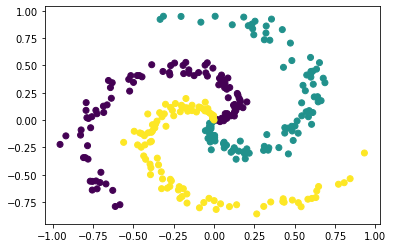

In [10]:
def create_data(points, classes):

    X = np.zeros((points * classes, 2))
    y = np.zeros(points * classes, dtype='uint8')

    for class_number in range(classes):
        
        ix = range(class_number * points, (class_number + 1) * points)
        
        r = np.linspace(0.0, 1.0, points)
        t = np.linspace(class_number * 4, (class_number + 1) * 4, points) + np.random.randn(points) * 0.2
        
        X[ix] = np.c_[r * np.cos(1 * t), r * np.sin(1 * t)]
        y[ix] = class_number
    
    return X, y

X, y = create_data(100, 3)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Test

In [17]:
dense1 = Layer_Dense(2 , 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output, y)
print(activation2.output[:4])
print(loss)

[[0.33333333 0.33333333 0.33333333]
 [0.33341527 0.33329288 0.33329184]
 [0.33353483 0.3332229  0.33324227]
 [0.33359559 0.33319758 0.33320683]]
1.100314225845281
